In [1]:
# python version 3.6.9 #
import pandas as pd # 1.1.5
import numpy as np # 1.19.5
import matplotlib.pyplot as plt
import matplotlib # 3.3.4
import scipy.stats as st # scipy 1.5.4

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rc('text', usetex=False)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 16})
plt.style.use('source_data/included/figure.style')
cm = plt.cm.get_cmap('tab20c')


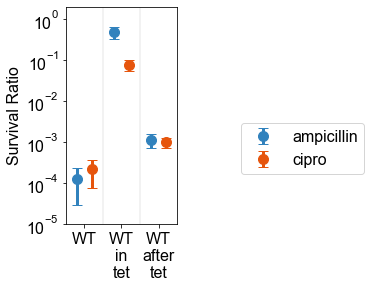

In [2]:
# figure 3A plot survival #
table = pd.read_csv('source_data/included/source_1B_ED1_2A.csv',sep=',')
table = table.loc[table['phase']=='lag']
table = table.loc[table['time_from_OD0.1']>20]

cm = plt.cm.get_cmap('tab20c')
np.random.seed(seed=1)
shift = 0.05
strain_list = ['MG1655','MG1655_in_tet','MG1655_after_tet']
names = ['WT','WT\nin\ntet','WT\nafter\ntet']
fig,ax = plt.subplots(figsize=(2,4))
i = 1

x = np.arange(1,4,1)
y = table.groupby(['strain'])['amp'].mean()[strain_list]
err = table.groupby(['strain'])['amp'].std()[strain_list]
ax.errorbar(x-0.2,y,yerr=err,fmt=".",markersize=20,capsize=5,color=cm(0),label='ampicillin')

x = np.arange(1,4,1)
y = table.groupby(['strain'])['cipro'].mean()[strain_list]
err = table.groupby(['strain'])['cipro'].std()[strain_list]
ax.errorbar(x+0.2,y,yerr=err,fmt=".",markersize=20,capsize=5,color=cm(4),label='cipro')
ax.set_yscale('log')

ax.set_ylim(10**(-5),10**0.3)
ax.set_xlim(0.5,3.5)
ax.set_xticks([1,2,3])
ax.set_ylim(10**(-5),10**0.3)
ax.set_yticks([10**-5,10**-4,10**-3,10**-2,10**-1,10**0])
for i in [1.5,2.5]:
    ax.axvline(i,color='k',linewidth=0.2,alpha=0.5)
ax.set_xticklabels(names)
ax.legend(bbox_to_anchor=(1.5, 0.5),fontsize=16)
ax.set_ylabel('Survival Ratio')

plt.savefig('figures/fig3a.pdf')


In [3]:
# Mann-Whitney U tests for fig 3A
strain1 = 'MG1655'
strain2 = 'MG1655_in_tet'
table.groupby(['strain'])['amp'].mean()[strain_list]
x = table.loc[(table['strain']==strain1),'amp'].dropna()
y = table.loc[(table['strain']==strain2),'amp'].dropna()
print(st.mannwhitneyu(x,y)[1])
x = table.loc[(table['strain']==strain1),'cipro'].dropna()
y = table.loc[(table['strain']==strain2),'cipro'].dropna()
print(st.mannwhitneyu(x,y)[1])
print(len(x))
print(len(y))

strain1 = 'MG1655'
strain2 = 'MG1655_after_tet'
x = table.loc[(table['strain']==strain1),'amp'].dropna()
y = table.loc[(table['strain']==strain2),'amp'].dropna()
print(st.mannwhitneyu(x,y)[1])
x = table.loc[(table['strain']==strain1),'cipro'].dropna()
y = table.loc[(table['strain']==strain2),'cipro'].dropna()
print(st.mannwhitneyu(x,y)[1])
print(len(x))
print(len(y))

strain1 = 'MG1655_in_tet'
strain2 = 'MG1655_after_tet'
x = table.loc[(table['strain']==strain1),'amp'].dropna()
y = table.loc[(table['strain']==strain2),'amp'].dropna()
print(st.mannwhitneyu(x,y)[1])
x = table.loc[(table['strain']==strain1),'cipro'].dropna()
y = table.loc[(table['strain']==strain2),'cipro'].dropna()
print(st.mannwhitneyu(x,y)[1])


0.004900713258121395
0.0048782602435154645
14
3
0.004900713258121395
0.0048782602435154645
14
3
0.04042779918502612
0.04042779918502612


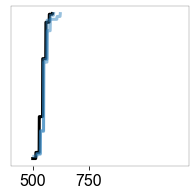

In [4]:
# fig 3B appearance times #

samples = {}
samples['WT'] = ['35-1_20230323','35-2_20230323','35-3_20230323','35-4_20230323','WT_1day_20220421','noTet1_20211115', 'noTet2_20211115', 'noTet3_20211115','wt_20221104','wt_20220829','MG1655_20220922']
samples['afterTet'] = ['afterTet1_20211115','afterTet2_20211115']
appearance_times = pd.read_csv('source_data/included/appearance_times_all.txt',sep='\t',index_col=0)

matplotlib.rcParams['axes.linewidth'] = 0.2 
colors = [cm(0),cm(0),cm(0),'k']
xmin = 400
xmax = 1200
alpha=0.5
fig, ax = plt.subplots(figsize=(3,3))
i=0
for t in ['WT_1day_20220421'] + samples['afterTet']:
    data = appearance_times.loc[t,'appearance']
    count, bins_count = np.histogram(data, bins=100)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    if i == 1:
        ax.plot(bins_count[1:], cdf,linewidth=3,color=colors[i],label='after tet (n=2)',alpha=alpha)
    elif i == 2:
        ax.plot(bins_count[1:], cdf,linewidth=3,color=colors[i],alpha=alpha)
    elif i == 0:
        ax.plot(bins_count[1:], cdf,linewidth=3,color='k',alpha=1,label='wt control')
    ax.set_yticks([])
    ax.set_xticks([500,750])
    ax.set_xlim([xmin,xmax])
    i += 1
    
plt.tight_layout()
plt.savefig('figures/fig3b_left.pdf')
matplotlib.rcParams['axes.linewidth'] = 1


MannwhitneyuResult(statistic=5.0, pvalue=0.13882350813820943)
MannwhitneyuResult(statistic=11.0, pvalue=0.4592723183924505)


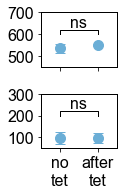

In [5]:
# fig3B statistics

## define function to get mean of appearance times ##
def f(rep):
    return(appearance_times.loc[rep,'appearance'].mean())
## make dictionary of mean appearance times ##
s_func = {}
for s in samples.keys():
    s_func[s] = []
    for rep in samples[s]:
        s_func[s].append(f(rep))
to_plot = ['WT','afterTet']

## test significant differences in mean appearance times ##
print(st.mannwhitneyu(s_func['WT'],s_func['afterTet']))

## plot means ##
fig,(ax,ax2) = plt.subplots(2,1,figsize=(2,3),sharex=True)
x = np.arange(0,len(to_plot))
means = [np.mean(s_func[x]) for x in to_plot]
stdevs = [np.std(s_func[x]) for x in to_plot]
for x_val,mean,stdev in zip(x,means,stdevs):
    ax.errorbar(x_val,mean,yerr=stdev,fmt=".",markersize=20,capsize=5,color=cm(1))

## define function to get range of appearance times ##
def f(rep):
    return(appearance_times.loc[rep,'appearance'].max()-appearance_times.loc[rep,'appearance'].min())
## make dictionary of range of appearance times ##
s_func = {}
for s in samples.keys():
    s_func[s] = []
    for rep in samples[s]:
        s_func[s].append(f(rep))

## test significant differences in range of appearance times ##
print(st.mannwhitneyu(s_func['WT'],s_func['afterTet']))

## plot ranges ##
means = [np.mean(s_func[x]) for x in to_plot]
stdevs = [np.std(s_func[x]) for x in to_plot]
for x_val,mean,stdev in zip(x,means,stdevs):
    ax2.errorbar(x_val,mean,yerr=stdev,fmt=".",markersize=20,capsize=5,color=cm(1))
ax2.set_xlim(-0.5,1.5)
ax2.set_xticks([0,1])
names = ['no\ntet','after\ntet']
ax2.set_xticklabels(names)
ax.set_ylim(450,700)
ax2.set_ylim(50,300)
## add significance to plot ##
x1 = 0
x2 = 1
y = 200
h = 20
ax2.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax2.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color='k',size=16)

x1 = 0
x2 = 1
y = 600
h = 20
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color='k',size=16)

plt.tight_layout()
plt.savefig('figures/fig3b_right.pdf')


In [6]:
## save principal component loadings for iPAGE (for fig 3C) ##
bnum_table = pd.read_csv('source_data/included/ecoli_bnum_table_updated_2.txt',sep='\t',index_col=0)
bnum_table = bnum_table.drop_duplicates()
bnum_table.index = bnum_table['gene']
PC_table = pd.read_csv('source_data/generated/fig3_pc1_loadings.txt',sep='\t',index_col=0) # saved in figure3_R notebook
PC_table['bnum'] = bnum_table['bnum']
PC_table['gene'] = PC_table.index
PC_table.index = PC_table['bnum']
PC_table['x'].sort_values().to_csv('source_data/generated/ipageInput_fig3_pc1.txt',sep='\t')


In [7]:
## save cluster markers for iPAGE (for fig 3C)##

def save_ipage_for_fig3(id1,id2,FDR):
    filename = 'source_data/generated/' + id1 + '_vs_' + id2 + '_markers_for_fig3.txt' # saved in fig3_persister_only.R (FindMarkers)
    table = pd.read_csv(filename,sep='\t',index_col=0)
    table.index = table['Row.names']
    table = table.drop('Row.names',axis=1)
    table = table.merge(bnum_table,left_index=True,right_index=True)
    table.index = table['bnum']
    table['less'] = -table['less']
    signed_p = []
    for h,l in zip(table['greater'],table['less']):
        if abs(h)<=abs(l):
            signed_p.append(h + (10**-300))
        elif abs(l)<abs(h):
            signed_p.append(l - (10**-300))
        else:
            print('error')
    table['signed_p'] = signed_p
    table['fixed_signif'] = (abs(table['signed_p']).sort_values()<FDR*np.arange(1,len(table)+1)/len(table)).astype(int)
    table['fixed_signif'] = (table['fixed_signif'] * (table['signed_p']/abs(table['signed_p']))).astype(int)
    output = 'source_data/generated/ipageInput_fig3_markers_' + id1 + '_vs_' + id2 + '.txt'
    (table['fixed_signif']+1).sort_values().to_csv(output,sep='\t')

FDR = 0.05
save_ipage_for_fig3('metG','tet',FDR)
save_ipage_for_fig3('hipA7','tet',FDR)
save_ipage_for_fig3('WT_d6','tet',FDR)



In [8]:
## load in results from PC1 iPAGE
## continuous mode; 8 bins; max_p=0.005; independence=0
pval_threshold = np.log10(0.001)
PC_matrix = pd.read_csv('source_data/included/ipageInput_fig3_pc1_pvmatrix_combined.txt',sep='\t',index_col=1)
PC_matrix_high = PC_matrix[['8']] ## look at only top two columns (most positive PC1 loading group)
PC_matrix_high = PC_matrix_high.iloc[:,0].str.split('/',expand=True)[0].astype(float)
## select terms with p-value <threshold for enrichment in top PC1 loadings
PC_matrix_high = PC_matrix_high[PC_matrix_high<pval_threshold].sort_values() 
PC1_high_terms = PC_matrix_high.index
PC1_high_terms


Index(['GO:0005624 membrane fraction',
       'GO:0004812 aminoacyl-tRNA ligase activity',
       'GO:0006418 tRNA aminoacylation for protein translation',
       'GO:0008610 lipid biosynthetic process',
       'GO:0006633 fatty acid biosynthetic process',
       'GO:0016874 ligase activity', 'CysB_Up CysB_Up',
       'GO:0019344 cysteine biosynthetic process', 'FruR_Up FruR_Up',
       'GO:0030170 pyridoxal phosphate binding', 'DgsA_Down DgsA_Down',
       'GO:0006508 proteolysis', 'GO:0008652 amino acid biosynthetic process',
       'GO:0006352 transcription initiation',
       'GO:0019538 protein metabolic process',
       'GO:0006099 tricarboxylic acid cycle'],
      dtype='object', name='0')

In [9]:
## read in iPAGE output for differential expression (FindMarkers) ## 
## discrete, P=0.05
pval_threshold = np.log10(0.05)
combined = pd.read_csv('source_data/included/ipageInput_fig3_markers_pvmatrix_combined.txt',sep='\t',index_col=0)
## clean up dataframe and make parsable ##
combined['comparison'] = combined.index.str.split('.txt_',expand=True).droplevel(1).str.replace('ipageInput_fig3_markers_','')
combined['type'] = combined.index.str.split('_PO_',expand=True).droplevel(0).str.split('_P.05_PAGE',expand=True).droplevel(1)
combined = combined.reset_index().drop('index',axis=1)
for column in ['0','1','2']:
    combined = combined.merge(combined[column].str.split('/',expand=True).rename(columns={0:column+'_pval_enriched',1:column+'_pval_depleted'}).astype(float),left_index=True,right_index=True)
combined = combined.drop(['0','1','2'],axis=1)
## resulting combined dataframe gives p-value (from iPAGE) of enrichment or depletion in each gene classification ##
## gene classifications are 0 (significantly underexpressed), 1 (not differentially expressed), 2 (significantly overexpressed) ##
combined.index = combined['GO']
combined = combined.drop('GO',axis=1)
## look for terms significantly enriched in metG persister cells vs cells in tet
## AND significantly enriched in PC1 positive loadings 
terms = combined.loc[(combined['2_pval_enriched']<pval_threshold)].groupby('GO')['comparison'].count().reindex(PC1_high_terms).dropna().index
terms

## for fig 3C: 'GO:0006099','GO:0004812','GO:0019538','GO:0008652'
## for fig S13B: 'GO:0030170','GO:0005624','GO:0019344','DgsA_Down','GO:0006633'
## remaining have overlap with other terms:
    # CysB_Up overlaps with GO:0019344
    # GO:0006418, GO:0016874 overlap with GO:0004812
    # FruR_Up overlaps with GO:0006099
    # GO:0008483 overlaps with GO:0030170
    # GO:0008610 overlaps with GO:0006633
    # GO:0006508 overlaps with GO:0019538

Index(['GO:0005624 membrane fraction',
       'GO:0004812 aminoacyl-tRNA ligase activity',
       'GO:0006418 tRNA aminoacylation for protein translation',
       'GO:0008610 lipid biosynthetic process',
       'GO:0006633 fatty acid biosynthetic process',
       'GO:0016874 ligase activity', 'CysB_Up CysB_Up',
       'GO:0019344 cysteine biosynthetic process', 'FruR_Up FruR_Up',
       'GO:0030170 pyridoxal phosphate binding', 'DgsA_Down DgsA_Down',
       'GO:0006508 proteolysis', 'GO:0008652 amino acid biosynthetic process',
       'GO:0019538 protein metabolic process',
       'GO:0006099 tricarboxylic acid cycle'],
      dtype='object', name='0')

In [10]:
# get p-values to report (metG*)
combined.loc[(combined['comparison']=='metG_vs_tet')].reindex(labels=PC1_high_terms).dropna()['2_pval_enriched'].sort_values()


0
CysB_Up CysB_Up                                          -6.451
GO:0019344 cysteine biosynthetic process                 -6.093
GO:0008652 amino acid biosynthetic process               -5.797
GO:0006099 tricarboxylic acid cycle                      -5.076
GO:0005624 membrane fraction                             -4.261
FruR_Up FruR_Up                                          -4.072
GO:0004812 aminoacyl-tRNA ligase activity                -3.941
GO:0006418 tRNA aminoacylation for protein translation   -3.300
DgsA_Down DgsA_Down                                      -2.413
GO:0019538 protein metabolic process                     -2.350
GO:0030170 pyridoxal phosphate binding                   -2.269
GO:0006508 proteolysis                                   -2.038
GO:0006633 fatty acid biosynthetic process               -1.815
GO:0008610 lipid biosynthetic process                    -1.740
Name: 2_pval_enriched, dtype: float64

In [11]:
# get p-values to report (hipA7)
combined.loc[(combined['comparison']=='hipA7_vs_tet')].reindex(labels=PC1_high_terms).dropna()['2_pval_enriched'].sort_values()


0
GO:0005624 membrane fraction                             -7.430
GO:0004812 aminoacyl-tRNA ligase activity                -6.083
DgsA_Down DgsA_Down                                      -4.338
GO:0006418 tRNA aminoacylation for protein translation   -4.319
GO:0008652 amino acid biosynthetic process               -3.495
GO:0016874 ligase activity                               -3.020
GO:0006633 fatty acid biosynthetic process               -2.493
FruR_Up FruR_Up                                          -2.326
GO:0008610 lipid biosynthetic process                    -2.052
GO:0019538 protein metabolic process                     -1.100
Name: 2_pval_enriched, dtype: float64

In [12]:
# get p-values to report (wt 6-day)
combined.loc[(combined['comparison']=='WT_d6_vs_tet')].reindex(labels=PC1_high_terms).dropna()['2_pval_enriched'].sort_values()


0
GO:0005624 membrane fraction                             -10.082
GO:0004812 aminoacyl-tRNA ligase activity                 -9.705
GO:0006418 tRNA aminoacylation for protein translation    -8.115
GO:0016874 ligase activity                                -5.621
GO:0008652 amino acid biosynthetic process                -4.468
FruR_Up FruR_Up                                           -4.110
DgsA_Down DgsA_Down                                       -1.957
GO:0019538 protein metabolic process                      -1.782
Name: 2_pval_enriched, dtype: float64

In [13]:
## find pathway most significantly enriched among negative PC1 loadings
## GO:0003735
PC_matrix_low = PC_matrix[['1']] ## look at lowest column (most negative PC1 loading group)
PC_matrix_low.iloc[:,0].str.split('/',expand=True)[0].astype(float).sort_values()

0
GO:0003735 structural constituent of ribosome   -39.995
GO:0005840 ribosome                             -39.093
GO:0030529 ribonucleoprotein complex            -38.310
GO:0019843 rRNA binding                         -31.578
GO:0006412 translation                          -28.058
                                                  ...  
CysB_Up CysB_Up                                   0.000
GO:0005351 sugar porter activity                 -0.000
GO:0003774 motor activity                         0.000
GO:0006779 porphyrin biosynthetic process         0.000
GO:0009288 flagellin-based flagellum              0.000
Name: 0, Length: 78, dtype: float64

In [14]:
# check p-values for GO:0003735 (enriched in tet vs metG/hipA7/wt 6-day persisters)
combined.loc[combined.index.str.contains('GO:0003735'),['comparison','0_pval_enriched']]

,comparison,0_pval_enriched
GO,,
GO:0003735 structural constituent of ribosome,hipA7_vs_tet,-9.990
GO:0003735 structural constituent of ribosome,metG_vs_tet,-32.570
GO:0003735 structural constituent of ribosome,WT_d6_vs_tet,-23.665
